In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import cross_val_score

import xgboost as xgb

In [18]:
cd '/content/drive/My Drive/Colab Notebooks/dw_matrix'

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [0]:
df = pd.read_csv('data/w_shoe_prices.csv', low_memory=False)

In [0]:
df_usd = df[ df.prices_currency == 'USD'].copy()

In [0]:
df_usd.prices_amountmin = pd.to_numeric( df_usd.prices_amountmin, errors='coerce')

In [22]:
df_clear = df_usd[(pd.notnull(df.prices_amountmin))]
df_clear.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(18199, 47)

In [23]:
df_clear.prices_amountmin.sample(5)

5095     78.00
144      39.99
16442    19.99
14993    41.99
5987     17.99
Name: prices_amountmin, dtype: float64

In [0]:
mean_price = np.mean( df_clear['prices_amountmin'])

In [25]:
mean_price

124.9637859223059

In [26]:
y_true = df_clear['prices_amountmin']
y_true.shape[0]

18199

In [27]:
y_pred = [mean_price] * y_true.shape[0]

mean_absolute_error(y_true=y_true, y_pred=y_pred)

137.9850053329601

In [28]:
filter_max = np.percentile(df_clear['prices_amountmin'], 99)
filter_max

1100.0

In [0]:
df_clear = df_clear [df_clear['prices_amountmin'] < filter_max]

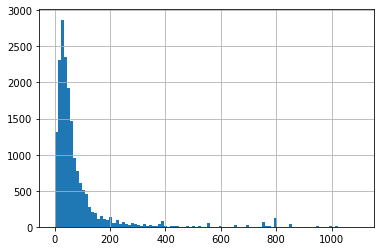

In [30]:
df_clear.prices_amountmin.hist(bins=100)

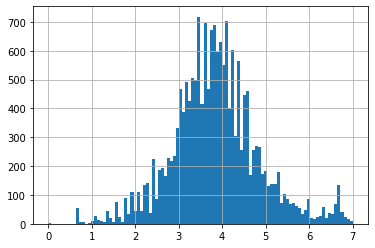

In [31]:
np.log1p( df_clear['prices_amountmin'] ) .hist(bins=100)

In [32]:
y_true = df_clear['prices_amountmin']

y_pred = [np.median(y_true)] * y_true.shape[0]

mean_absolute_error(y_true=y_true, y_pred=y_pred)

56.284606410754954

In [33]:
y_true = df_clear['prices_amountmin']

price_log_mean = np.expm1(np.mean(np.log1p(y_true)))


y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true=y_true, y_pred=y_pred)

56.31106186683235

In [39]:
df_clear.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'websiteids', 'weight'],
      dtype='object')

In [40]:
df_clear.brand.factorize()[0]

array([   0,    0,    0, ..., 1220, 1220, 1220])

In [0]:
df_clear['brand_cat'] = df_clear.brand.factorize()[0]

In [0]:
feats =  ['brand_cat']

def run_model(feats, model=DecisionTreeRegressor(max_depth=5)):
  X = df_clear[ feats ].values
  y = df_clear['prices_amountmin'].values

  # model = DecisionTreeRegressor(max_depth=5)

  scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [43]:
run_model(['brand_cat'])

(-51.7790224568183, 0.6800384408022533)

In [0]:
df_clear['manufacturer_cat'] = df_clear.manufacturer.factorize()[0]

In [47]:
run_model(['manufacturer_cat'])

(-67.71896474272188, 3.887282618857807)

In [48]:
run_model(['brand_cat', 'manufacturer_cat'])

(-51.45401686830782, 0.8875568782863449)

In [0]:
df_clear['colors_cat'] = df_clear.colors.factorize()[0]
df_clear['categories_cat'] = df_clear.categories.factorize()[0]

In [61]:
run_model(['brand_cat', 'manufacturer_cat', 'colors_cat', 'categories_cat'])

(-52.20987811127317, 0.3410840448765769)

In [0]:
model = xgb.XGBRegressor(max_depth=5)

In [66]:
run_model(['brand_cat', 'manufacturer_cat', 'colors_cat', 'categories_cat'], model=model)

[18:10:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:10:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:10:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:10:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:10:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(-48.672761451973734, 3.4000713135965572)

In [0]:
!git config --global user.email "mszzukowski@gmail.com"
!git config --global user.name "Mateusz Żukowski"

In [0]:
!git add matrix_one/day4.ipynb

In [0]:
!git commit -m "First try with mens shoes price prediction"

[master ab91f27] First try with mens shoes price prediction
 1 file changed, 1 insertion(+)
 create mode 100644 matrix_one/day4.ipynb


In [0]:
!git push -u origin master

Counting objects: 4, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 13.51 KiB | 2.70 MiB/s, done.
Total 4 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/mszzukowski/dw_matrix.git
   4b8b2a3..ab91f27  master -> master
Branch 'master' set up to track remote branch 'master' from 'origin'.
